# Метод центрального пути

Исследуем следующий алгоритм:

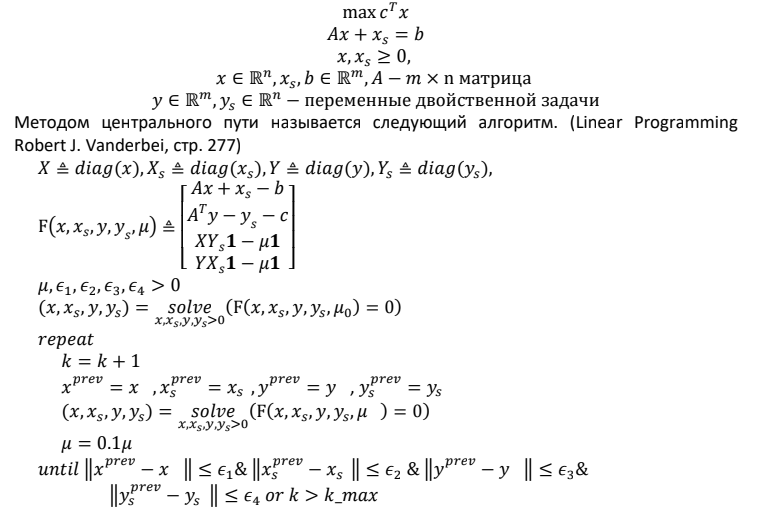

## Ход исследования


1.   Покажем, что если алгоритм сходится, то он сходится к решению задачи ЛП $(x^k, x_s^k, y^k, y_s^k) \rightarrow (x^*, x_s^*, y^*, y_s^*)$ при $\mu \rightarrow 0$.
2.   Реализуем алгоритм демпфированного метода Ньютона (варьируемая длина шага) для задачи $\underset{x, x_s, y, y_s > 0}{solve}(F(x, x_s, y, y_s, \mu) = 0)$.
3.   Покажем экспериментально, что с помощью построенного алгоритма можно решить
задачи ЛП.
4.   Сформулируем условие выхода, позволяющее детектировать неограниченность задачи. Покажем экспериментально, что условие работает.



In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linprog
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.set(palette='Set2')

#### a)

Покажем, что если алгоритм сходится, то он сходится к решению задачи ЛП $(x^k, x_s^k, y^k, y_s^k) \rightarrow (x^*, x_s^*, y^*, y_s^*)$ при $\mu \rightarrow 0$.

Задача ЛП в канонической форме:
$$\text{max }c^Tx \qquad (1)$$
$$Ax + x_s = b$$
$$x, x_S \geq 0,$$
$$x \in \mathbb{R}^m, x_s, b \in \mathbb{R}^n, A - m \times n \text{ матрица}$$
$$y \in \mathbb{R}^m, y_s \in \mathbb{R}^n - \text{ переменные двойственной задачи.}$$

Двойственная:
$$\text{min }b^Ty$$
$$A^Ty - y_s = c$$
$$y, y_s \geq 0,$$
$$x \in \mathbb{R}^m, x_s, b \in \mathbb{R}^n, A - m \times n \text{ матрица}$$
$$y \in \mathbb{R}^m, y_s \in \mathbb{R}^n - \text{ переменные двойственной задачи.}$$

**Опр.** Барьерная функция -- непрерывная функция, значение которой стремится к бесконечности при приближении точки к границе области допустимых значений.

Воспользуемся одной из наиболее часто используемых барьерных функций -- логарифмической. Для каждой переменной мы добавляем в целевую функцию новое слагаемое, являющеся умноженной на логарифм переменной константой.

$$f(x, x_S) = c^Tx + \mu \sum\limits_i \left(\text{log }x_i + \text{log }  x_{si}\right) \qquad (2)$$



Задачи (1) и (2) не эквивалентны, но при устремлении параметра $\mu$ к нулю $\text{argmax }f(x, x_s)$ сходится к решению задачи (1).

То, что максимальное значение so-called барьерной функции достигается в области, образуемой самой вложенной линией уровня, проиллюстрировано ниже:

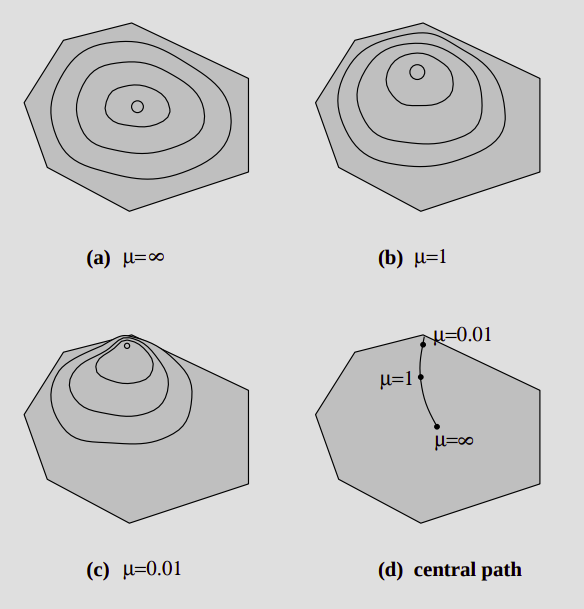

(Изучаемый центральный путь изображен на рисунке (d). Рассматривающийся как функция от $\mu$, он есть множество оптимальных решений барьерной задачей)

**Воспользуемся методом множителей Лагранжа для доказательства исходного утверждения о том, что при устремлении $\mu$ к нулю максимум функции (2) приближается к решению задачи (1).**

Наиболее простой формой задачи является задача с единственным ограничивающим равенством:
$$\text{max } f(x),$$
$$g(x) = 0$$

Мы же будем рассматривать случай множественных ограничений:
$$g_i(x) = 0, i \in \overline{1, n}$$

За $x^*$ обозначим решение задачи максимизации (2). Тогда будет верным
$$g(x^*) = 0,$$
$$\nabla f(x^*) = y\nabla g(x^*),$$
где последнее уравнение отражает пропорциональность $\nabla f(x^*)$ вектору $\nabla g(x^*)$, а $y$ есть константа пропорциональности -- множитель Лагранжа.

Вернемся к множественным ограничениям -- критическая точка будет удовлетворять следующим уравнениям:
$$g(x^*) = 0,$$
$$\nabla f(x^*) = \sum\limits_{i=1}^m y_i \nabla g(x^*).$$

Всю скрытую за формулами геометрию к счастью для нас подытоживает и алгебраическое выражение: рассмотрим функцию Лагранжа и её критические точки:
$$L(x, y) = f(x) - \sum_i y_ig_i(x)$$

Вспомнив курс по математическому анализу третьего семестра, отыщем первые частные производные и приравняем их к нулю:
$$\dfrac{\partial L}{\partial x_j} = \dfrac{\partial f}{\partial x_j} - \sum_i y_i  \dfrac{\partial g}{\partial x_j} = 0, \qquad j = \overline{1, n},$$
$$\dfrac{\partial L}{\partial y_j} = -g_i = 0, \qquad i = \overline{1, m}.$$

**Теорема.** Если ограничения линейны, критическая точка $x^*$ является локальным максимумом при условии
$$\xi^T Hf(x^*)\xi < 0$$
для любого $\xi \neq 0$, удовлетворяющего условию
$$\xi^T \nabla g_i(x^*) = 0, \qquad i = \overline{1, m}.$$
Здесь $Hf(x) = \left[\dfrac{\partial^2 f}{\partial x_i \partial x_j}\right]$ -- матрица вторых производных, также называющаяся гессианом.

**Наконец приходим к применению метода множителей Лагранжа в контексте решения барьерной задачи.**

$$f(x, x_s) = c^T x + \mu\sum_j\log x_j  + \mu\sum_i\log x_{si}$$

Найдем функцию Лагранжа для данной задачи:
$$L(x, x_{si}, y) = c^T x + \mu \sum_j \log x_j  + \mu \sum_i \log x_{si} + y^T(b-Ax-x_s).$$

Уже по описанному алгоритму найдем частные производные и приравняем их к нулю -- так получим условия оптимальности первого порядка, запишем их в матричном виде:
$$A^Ty - \mu X^{-1}e=c$$
$$y = \mu X_s^{-1}e$$
$$Ax+x_s=b.$$

$X = \text{diag}(x_i), X_s = \text{diag}(x_{si})$. Замена $y_s = \mu X^{-1}e$ позволит более лаконично записать систему выше (3):
$$AX + X_s = b$$
$$A^T y - y_s = c$$
$$X y_s e = \mu e$$
$$y X_s e = \mu e$$

**Осталось немного: посчитаем матрицу Гессе:**
* Первые производные:
$$\dfrac{\partial f}{\partial x_i} = c_i + \dfrac{\mu}{x_i}, \qquad j = \overline{1, n},$$
$$\dfrac{\partial f}{\partial x_{si}} = \dfrac{\mu}{x_{si}}, \qquad j = \overline{1, m}.$$
* Вторые производные:
$$\dfrac{\partial^2 f}{\partial x_{i}^2} = -\dfrac{\mu}{x_{i}^2}, \qquad j = \overline{1, n},$$
$$\dfrac{\partial^2 f}{\partial x_{si}^2} = -\dfrac{\mu}{x_{si}^2}, \qquad j = \overline{1, n}.$$
$$\dfrac{\partial^2 f}{\partial x_i \partial x_{si}} = 0.$$

По теореме выше и полученных сведениях о гессиане (диагональная матрица с отрицательными элементами) можем заключить, что может существовать лишь одна критическая точка, и в случае существования это глобальный максимум. Существование решении доказывается при использовании теоремы ниже:

**Теорема.** Решение барьерной существует тогда и только тогда, когда у первичной и двойственной допустимых областей непустая внутренность.

**Следствие.** Если прямое допустимое множество (или его двойственное) имеет
непустую внутренность и ограничено, то для каждого $\mu>​​0$ существует единственное решение
$$(x_\mu, x_{s\mu}, y_\mu, y_s)$$
задачи (3).

#### b)

Реализуем алгоритм демпфированного метода Ньютона (варьируемая длина шага) для задачи $\underset{x, x_s, y, y_s > 0}{solve}(F(x, x_s, y, y_s, \mu) = 0)$.

Зададим
$$\xi = 
\begin{pmatrix}
x \\
x_s \\
y \\
y_s \\
\mu
\end{pmatrix},
\quad
F(\xi) = 
\begin{pmatrix}
Ax + x_s - b \\
A^T - y_s - c \\
X Y_s e - \mu e \\
Y X_s e - \mu e
\end{pmatrix}
$$

Так, $\xi_\mu$ является корнем $F$. Осталось задать на каждый итерации переход к координатам следующей точки нашего пути, а при этом учесть необходимость сохранения координат неотрицательными.

Освежим в памяти сам алгоритм:

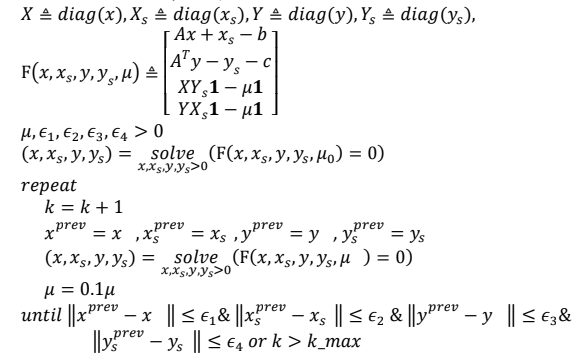

*Как выбрать демпфирующий параметр метода, для того чтобы гарантировать, что полученные решения будут неотрицательными?*

Для каждой переменной $t$ будем осуществлять переход к $t + \theta \Delta t, \; \theta = \text{const}$. Подбор параметра $\theta$ и отвечает на поставленный выше вопрос:

$$\theta \leq \dfrac{t_j}{|\Delta t_j|} \forall j$$
$$\mu = \delta \dfrac{y_s^Tx + y^Tx_s}{n+m} \quad (1),$$
где значение $\delta$ чаще берется равным 0.1. 

$$\mu = \text{min} \left\{ r \left(\underset{ij}{\text{max}} \left\{-\dfrac{\Delta x_j}{x_j}, -\dfrac{\Delta x_{si}}{x_{si}}, -\dfrac{\Delta y_i}{y_i}, -\dfrac{\Delta y_{sj}}{y_{sj}}\right\}\right)^{-1}, 1 \right\} \quad (2),$$



Напомним:

$$A \in \mathbb{R}^{m \times n}, \; b \in \mathbb{R}^m, \; c \in \mathbb{R}^n$$
$$x, y_s \in \mathbb{R}^{n}, \; y, x_s \in \mathbb{R}^{m}$$

Вид `A_matr` далее в коде:

$$A\_matr(x, x_s, y, y_s) = 
\begin{pmatrix}
A & E & 0 & 0 \\
0 & 0 & A^T & -E \\
y_s & 0 & 0 & X \\
0 & y & X_s & 0
\end{pmatrix}
$$

In [ ]:
class DampedNewtonAlgo:
    """
    Класс, реализующий демпфированный алгоритм Ньютона и сопутствующие функции.
    """

    def __init__(self, A, b, c, x, x_s, y, y_s):
        # Данные исходной системы: матрица и два вектора
        self.A = A
        self.b = b
        self.c = c
        # Аргументы (векторы)
        self.x = x
        self.x_s = x_s
        self.y = y
        self.y_s = y_s
        self.path = []
        # Параметры и пределы
        self.delta = 0.1
        self.r = 0.9
        self.delta_sq_sum = 1e-3
        self.x_sq_sum = 1e8
        self.iter_limit = 1000

    # Вспомогательные функции для solve
    def check_limits(self, delta, curr_x, iter_num):
        if (delta**2).sum() < self.delta_sq_sum or \
               (curr_x**2).sum() > self.x_sq_sum or \
               iter_num > self.iter_limit:
            return True
        else:
            return False

    # "Собираем" линейную систему
    def form_matr(self, X, X_s, Y, Y_s, mu_i,
                  curr_x, curr_xs, curr_y, curr_ys):
        n = self.A.shape[1]
        m = self.A.shape[0]
        return [np.vstack((
            np.hstack((self.A, np.eye(m), np.zeros((m, m)), np.zeros((m,n)))), 
            np.hstack((np.zeros((n,n)), np.zeros((n, m)), self.A.T, -np.eye(n))),
            np.hstack((Y_s, np.zeros((n, m)), np.zeros((n, m)), X)),
            np.hstack((np.zeros((m, n)), Y, X_s, np.zeros((m, n))))
            )),
               np.hstack((self.b - self.A @ curr_x - curr_xs,
                    self.c - self.A.T @ curr_y + curr_ys,
                    mu_i * np.ones(n) - X @ Y_s @ np.ones(n),
                    mu_i * np.ones(m) - Y @ X_s @ np.ones(m)))]

    # Поиск решения задачи
    def solve(self):
        curr_x = self.x
        curr_xs = self.x_s
        curr_y = self.y
        curr_ys = self.y_s
        n = self.A.shape[1]
        m = self.A.shape[0]
        iter_num = 0
        while True:
            X = np.diag(curr_x)
            X_s = np.diag(curr_xs)
            Y = np.diag(curr_y)
            Y_s = np.diag(curr_ys)

            # обратимся к выражению (1) выше
            mu_i = self.delta * ((curr_x*curr_ys).sum() + \
                                 (curr_xs*curr_y).sum()) / (n + m)

            # Составляем систему лин. уравнений Ax = b
            equations = self.form_matr(X, X_s, Y, Y_s, mu_i,
                                       curr_x, curr_xs, curr_y, curr_ys)

            delta = np.linalg.solve(equations[0], equations[1])
            if self.check_limits(delta, curr_x, iter_num):
                break

            theta = min(1, self.r / (- delta / \
                        np.hstack((curr_x, curr_xs, curr_y, curr_ys))).max())

            # Обновляем значения переменных и добавляем новую точку в путь
            curr_x += theta * delta[: n]
            curr_xs += theta * delta[n : n + m]
            curr_y += theta * delta[n + m : n + 2 * m]
            curr_ys += theta * delta[n + 2 * m :]
            self.path.append(list(curr_x))

            ++iter_num
            # Проверка на неотрицательность
            variables = np.array([curr_x, curr_xs, curr_y, curr_ys])
            for j, var in enumerate(variables):
                assert (var > 0).all(), f'Variable {j} is negative'

        return 0

    def illustrate(self, x_lines, y_lines, d_lines,
                   fill_points=None, type=None):
        assert len(self.path) > 0, 'No solution, try to use \'solve\' method'
        # decor
        colours = ["navy", "darkorange", "firebrick", "cyan", "deeppink"]
        title = 'Проверка реализации демпфированного алгоритма Ньютона'
        if not type is None:
            title = title + f' ({type})'
        font_sizes = [20, 18, 16]

        # graph
        sns.set(style="whitegrid")
        chart = plt.figure(figsize=(14, 8))
        ax = chart.add_axes([0,0,1,1])
        ax.grid(True)
        ax.set_title(title, fontsize = font_sizes[0])
        grid = np.linspace(-10, 10, 300)

        for i, x_lim in enumerate(x_lines):
            if i == 0:
                plt.axvline(x = x_lim, color = colours[0],
                            alpha=0.5, label='Ограничения из условия')
            else:
                plt.axvline(x = x_lim, color = colours[0], alpha=0.5)
        for y_lim in y_lines:
            plt.axhline(y = y_lim, color = colours[0], alpha=0.5)
        for d_lim in d_lines:
            plt.plot(grid, (d_lim[2] - grid*d_lim[0]) / \
                     d_lim[1], color=colours[0], alpha=0.5)

        if not fill_points is None:
            plt.fill(fill_points[0], fill_points[1],
                     alpha=0.2, color='darkorange',
                     label='Допустимое множество')

        for i, point in enumerate(self.path):
            if i == 0:
                plt.scatter(point[0], point[1], color = colours[2],
                            label='central path')
            if i == len(self.path) - 1:
                plt.scatter(point[0], point[1], color = colours[0],
                            label='Решение задачи', marker="*",
                            s=200, zorder=10)
            else:
                plt.scatter(point[0], point[1], color = colours[2])

        plt.legend(fontsize = font_sizes[2])

#### c)

Покажем экспериментально, что с помощью построенного алгоритма можно решить
задачи ЛП.

Рассмотрим задачу 2.5 из указанного источника:$$\max~ x_1 + 3x_2$$
$$-x_1 - x_2 \leq -3$$
$$-x_1 + x_2 \leq -1$$
$$x_1 + 2x_2 \leq 4$$
$$x_1,~x_2 \geq 0$$

Соответствующая ей двойственная:
$$\min~ -3y_1 -y_2 + 4y_3 $$
$$-y_1 - y_2 + y_3 \geq 1$$
$$-y_1 + y_2 + 2y_3 \geq 3$$
$$y_1,~y_2,~y_3 \geq 0 $$

Зададим координаты опорной точки:
$$x = (3,0.25),~ x_s=(0.25, 1.75, 0.5),$$
$$y=(0, 0, 0),~ y_s = (1, 3).$$

In [ ]:
A = np.array([[-1., -1.], [-1., 1.], [1., 2.]])
b = np.array([-3., -1., 4.])
c = np.array([1., 3.])
x = np.array([3, 0.25])
x_s = np.array([0.25, 1.75, 0.5])
y = np.array([0., 0., 0.])
y_s = np.array([1., 3.])
cp_problem = DampedNewtonAlgo(A, b, c, x, x_s, y, y_s)
cp_problem.solve()
cp_problem.path

[[3.3917872340425532, 0.2791063829787234],
 [3.110990888592921, 0.34860609254156505],
 [2.7107539530824747, 0.5875772858787791],
 [2.1220321686375643, 0.9078009552585613],
 [2.0138572127714442, 0.9899530975720122],
 [2.016045197893387, 0.9908377500504721]]

(1.0, 5.0)

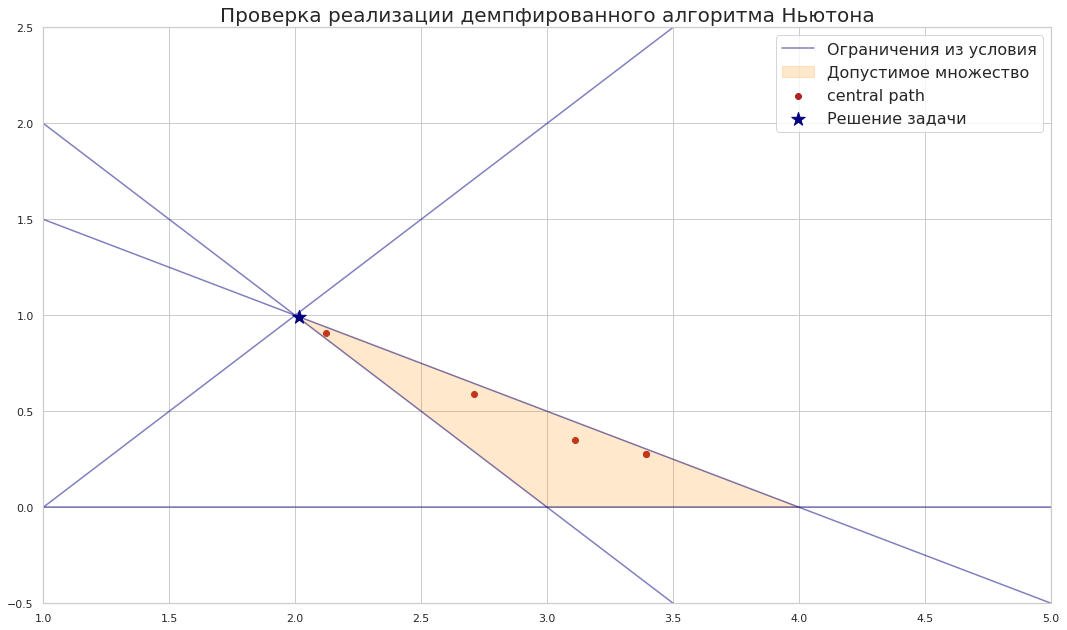

In [ ]:
cp_problem.illustrate([0], [0], [[-1, -1, -3], [-1, 1, -1], [1, 2, 4]],
                      [[2, 3, 4], [1, 0, 0]])

plt.ylim(-0.5, 2.5)
plt.xlim(1, 5)

#### d)

Условие выхода, которое позволяет детектировать неограниченность задачи, заложено в функцию `check_limits`. Проверим, насколько корректно оно работает, рассмотрев предыдущую задачу без некоторых исходных ограничений.

In [ ]:
A = np.array([[-1., -1.]])
b = np.array([-3.])
c = np.array([1., 3.])
x = np.array([3, 0.25])
x_s = np.array([0.25])
y = np.array([0.])
y_s = np.array([1., 3.])
cp_problem_unlim = DampedNewtonAlgo(A, b, c, x, x_s, y, y_s)
cp_problem_unlim.solve()
cp_problem_unlim.path

[[4.665, 0.37],
 [5.998009562064899, 0.5739617387462601],
 [8.794602183396119, 0.8834392693512988],
 [14.238007416095282, 1.441453226101787],
 [24.75532601875434, 2.509914338318432],
 [44.83291564295975, 4.5470947241994635],
 [82.90881143271939, 8.409625149652657],
 [155.15357624408264, 15.738022229858846],
 [292.3651280539897, 29.656422267701473],
 [553.0485285093334, 56.09944756990373],
 [1048.3420565882545, 106.34067108582865],
 [1989.3986383968884, 201.79887063171267],
 [3777.405905253894, 383.16942690993596],
 [7174.619543210301, 727.7736005641382],
 [13629.323099510035, 1382.5238760992424]]

(1.5, 100.0)

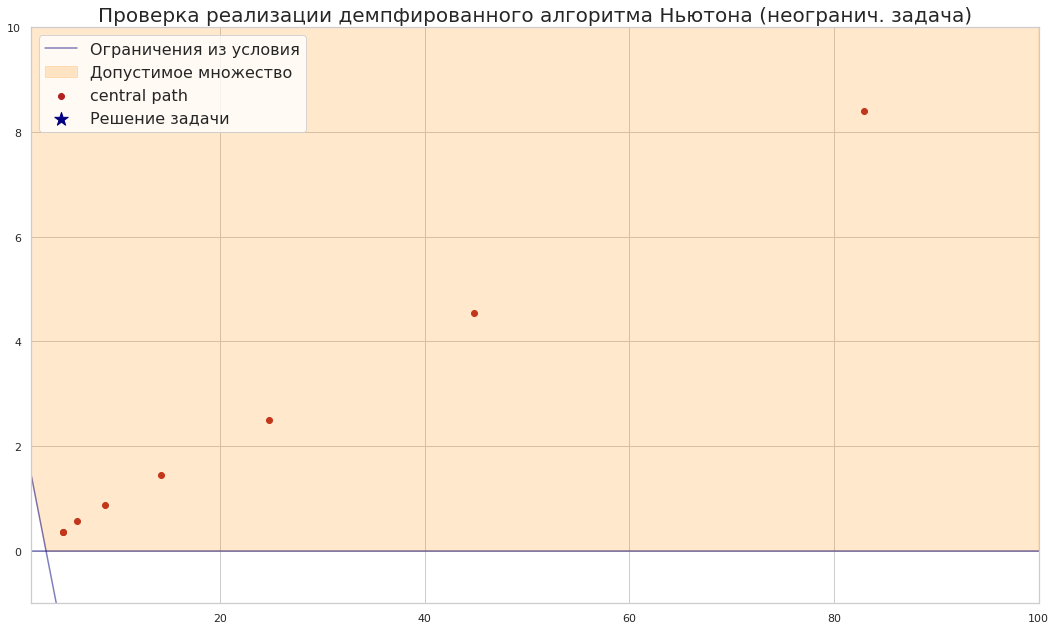

In [ ]:
cp_problem_unlim.illustrate([0], [0], [[-1, -1, -3]],
                      [[0, 0, 3, 4, 100, 100], [100, 3, 0, 0, 0, 100]],
                      'неогранич. задача')

plt.ylim(-1, 10)
plt.xlim(1.5, 100)

Видим, что условие действительно работает: центральный путь все еще в допустимом множестве значений, алгоритм завершился, неограниченная задача его не "убивает".

### Источники информации

[Linear Programming: Foundations and Extensions, Robert J. Vanderbei](http://people.cs.uchicago.edu/~ivan/math/constrained_optimization_book.pdf)